In [ ]:
%matplotlib inline

import matplotlib.pyplot as plt
from google.colab import drive
import numpy as np
import pandas as pd
import seaborn as sns

drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os

print(os.listdir('/content/drive/MyDrive/Citadel Data Open 2021/data/'))

['US_States', 'Global', '.ipynb_checkpoints', 'EU']


In [ ]:
dir = '/content/drive/MyDrive/Citadel Data Open 2021/data/'
dat = pd.read_csv(dir + 'US_States/OxCGRT_latest.csv')
dat['Date_clean'] = pd.to_datetime(dat['Date'].astype(str))
#dat = dat.loc[dat['Date_clean'] >= '03/01/2020']
print(dat)

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (2,3) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


       CountryName CountryCode  ... EconomicSupportIndexForDisplay Date_clean
0            Aruba         ABW  ...                            0.0 2020-01-01
1            Aruba         ABW  ...                            0.0 2020-01-02
2            Aruba         ABW  ...                            0.0 2020-01-03
3            Aruba         ABW  ...                            0.0 2020-01-04
4            Aruba         ABW  ...                            0.0 2020-01-05
...            ...         ...  ...                            ...        ...
119982    Zimbabwe         ZWE  ...                           25.0 2021-02-26
119983    Zimbabwe         ZWE  ...                           25.0 2021-02-27
119984    Zimbabwe         ZWE  ...                           25.0 2021-02-28
119985    Zimbabwe         ZWE  ...                           25.0 2021-03-01
119986    Zimbabwe         ZWE  ...                           25.0 2021-03-02

[119987 rows x 50 columns]


In [ ]:
us_dat = dat.loc[dat['CountryName']=='United States']
us_dat = us_dat.loc[us_dat['Jurisdiction'] == 'STATE_TOTAL']
print(us_dat['RegionName'].value_counts(dropna=False))
print(us_dat.columns)

Nebraska          427
Texas             427
West Virginia     427
Iowa              427
Montana           427
Virginia          427
Ohio              427
California        427
Tennessee         427
New Mexico        427
Louisiana         427
Wisconsin         427
Michigan          427
Utah              427
Massachusetts     427
Nevada            427
Illinois          427
Washington DC     427
Washington        427
Indiana           427
Wyoming           427
Arkansas          427
Minnesota         427
New Jersey        427
Idaho             427
Vermont           427
Delaware          427
Hawaii            427
South Carolina    427
Connecticut       427
Alaska            427
North Dakota      427
Oklahoma          427
Missouri          427
Alabama           427
Arizona           427
Maryland          427
Rhode Island      427
New Hampshire     427
South Dakota      427
Mississippi       427
Colorado          427
Georgia           427
Kentucky          427
Pennsylvania      427
Kansas    

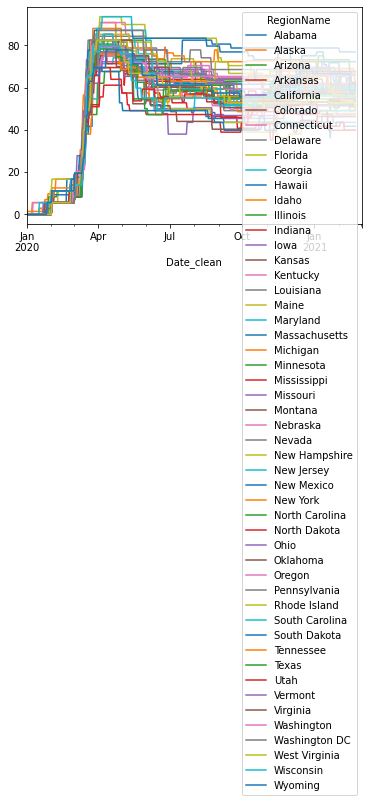

In [ ]:
us_dat.groupby(['Date_clean', 'RegionName'])['StringencyIndex'].mean().unstack().plot()
plt.show()

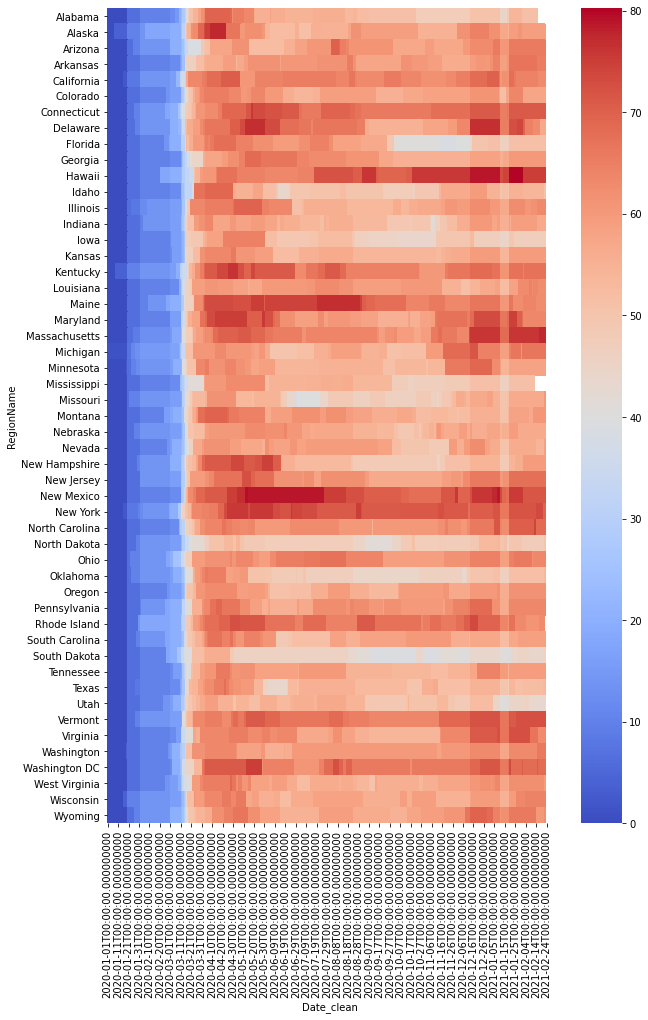

In [ ]:
### READY FOR FINAL PLOT @SHERIDAN

# fig,ax = plt.subplots(figsize=(10, 15))
# sns.heatmap(us_dat.groupby(['RegionName', 'Date_clean'])['ContainmentHealthIndex'].mean().unstack(), 
#             vmin=0, vmax=100, cmap='coolwarm', ax=ax)

fig,ax = plt.subplots(figsize=(10, 15))
sns.heatmap(us_dat.groupby(['RegionName', 'Date_clean'])['ContainmentHealthIndex'].mean().unstack(), 
            vmin=0, vmax=us_dat['ContainmentHealthIndex'].max(), cmap='coolwarm', ax=ax)
plt.show()

In [ ]:
country_dat = dat.loc[dat['Jurisdiction']=='NAT_TOTAL']
print(country_dat['CountryName'].value_counts())

Poland        427
Jamaica       427
Comoros       427
Uganda        427
Malaysia      427
             ... 
Mauritius     427
Azerbaijan    427
Greece        427
Latvia        427
Cambodia      427
Name: CountryName, Length: 186, dtype: int64


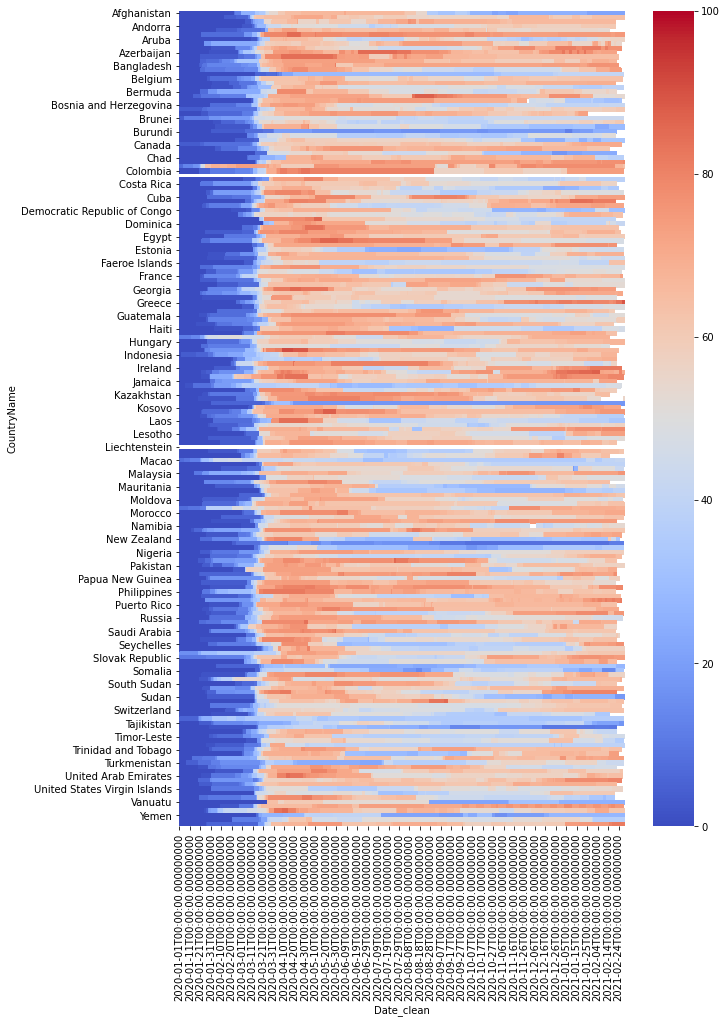

In [ ]:
fig,ax = plt.subplots(figsize=(10, 15))
sns.heatmap(country_dat.groupby(['CountryName', 'Date_clean'])['ContainmentHealthIndex'].mean().unstack(), 
            vmin=0, vmax=100, cmap='coolwarm', ax=ax)
plt.show()

In [ ]:
us_dat['Date'] = us_dat['Date_clean'].astype(str)
us_dat['statename'] = us_dat['RegionName']
us_dat.loc[us_dat['statename']=='Washington DC', 'statename'] = 'District of Columbia'

us_trim = us_dat[['statename', 'Date', 'StringencyIndex', 'ContainmentHealthIndex']]
print(us_trim['statename'].value_counts(dropna=False))
print(us_trim.groupby('statename')[['StringencyIndex', 'ContainmentHealthIndex']].agg(lambda x: x.isnull().sum()))

geo_xwalk = pd.read_csv(dir + 'US_States/TrackTheRecovery/GeoIDs - State.csv')
geo_xwalk = geo_xwalk[['statefips', 'statename', 'stateabbrev']]
print(geo_xwalk)
us_trim = us_trim.merge(geo_xwalk, on='statename', how='left', indicator='match')
print(us_trim['match'].value_counts())
print(us_trim.columns)

Delaware                427
South Carolina          427
New Hampshire           427
Nebraska                427
Kansas                  427
North Dakota            427
New Mexico              427
Georgia                 427
North Carolina          427
Wyoming                 427
Missouri                427
Washington              427
Montana                 427
Arizona                 427
Michigan                427
Maryland                427
Texas                   427
Florida                 427
Rhode Island            427
Minnesota               427
New Jersey              427
Connecticut             427
Maine                   427
Tennessee               427
Louisiana               427
Kentucky                427
New York                427
Massachusetts           427
Illinois                427
West Virginia           427
Idaho                   427
Nevada                  427
Wisconsin               427
Alabama                 427
Vermont                 427
Iowa                

In [ ]:
shadow_dat = pd.read_csv(dir + 'US_States/cleaned_data/mobility_pca_only.csv')
m = us_trim.merge(shadow_dat, on=['Date', 'statefips', 'statename'], how='outer', indicator='_merge')
print(m['_merge'].value_counts())
# Looks like we are just losing stuff before 2/1/20 (which is our begin cutoff) and after 2/26/21
print(m.loc[m['_merge']=='left_only', 'Date'].value_counts().sort_index())
m = m.loc[m['_merge']=='both']
m = m[['statename', 'Date', 'StringencyIndex', 'ContainmentHealthIndex',
       'statefips', 'stateabbrev', 'shadow_index_normalized']]
print(m.columns)
m.to_csv(dir + 'US_States/cleaned_data/mobility_and_stringency.csv')


# plt.figure()
# fl = m.loc[m['statename']=='Florida']
# plt.plot(pd.to_datetime(fl['Date']), fl[['ContainmentHealthIndex', 'shadow_index_normalized']])
# plt.ylim(0,100)
# plt.title('Florida')

# plt.figure()
# ca = m.loc[m['statename']=='California']
# plt.plot(pd.to_datetime(ca['Date']), ca[['ContainmentHealthIndex', 'shadow_index_normalized']])
# plt.ylim(0,100)
# plt.title('California')

# plt.figure()
# sd = m.loc[m['statename']=='South Dakota']
# plt.plot(pd.to_datetime(sd['Date']), sd[['ContainmentHealthIndex', 'shadow_index_normalized']])
# plt.ylim(0,100)
# plt.title('South Dakota')

# m['adherence_ratio'] = m['shadow_index_normalized'] / m['ContainmentHealthIndex']
# fig,ax = plt.subplots(figsize=(10, 15))
# sns.heatmap(m.groupby(['statename', 'Date'])['adherence_ratio'].mean().unstack(), 
#             cmap='viridis', ax=ax)



both          19941
left_only      1836
right_only        0
Name: _merge, dtype: int64
2020-01-01    51
2020-01-02    51
2020-01-03    51
2020-01-04    51
2020-01-05    51
2020-01-06    51
2020-01-07    51
2020-01-08    51
2020-01-09    51
2020-01-10    51
2020-01-11    51
2020-01-12    51
2020-01-13    51
2020-01-14    51
2020-01-15    51
2020-01-16    51
2020-01-17    51
2020-01-18    51
2020-01-19    51
2020-01-20    51
2020-01-21    51
2020-01-22    51
2020-01-23    51
2020-01-24    51
2020-01-25    51
2020-01-26    51
2020-01-27    51
2020-01-28    51
2020-01-29    51
2020-01-30    51
2020-01-31    51
2021-02-26    51
2021-02-27    51
2021-02-28    51
2021-03-01    51
2021-03-02    51
Name: Date, dtype: int64
Index(['statename', 'Date', 'StringencyIndex', 'ContainmentHealthIndex',
       'statefips', 'stateabbrev', 'shadow_index_normalized'],
      dtype='object')
